In [2]:
import spkit as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from copy import deepcopy

In [3]:
raw = np.array(pd.read_csv("K:\Clean Data\IGE\shirband\LB.csv", skiprows = 2))

In [4]:
X = deepcopy(raw[1080000:1090000, 2:])

In [5]:
ch_names = [str(i) for i in range(X.shape[1])]
fs = 300

(10000, 18)


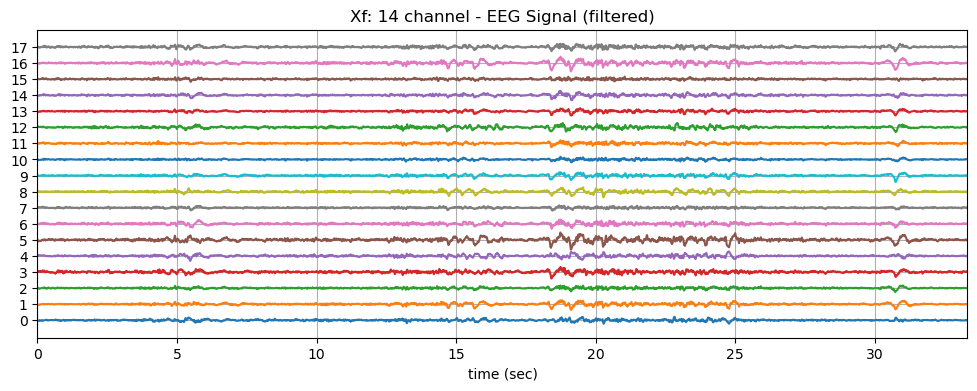

In [6]:
Xf = sp.filter_X(X,band=[1], btype='highpass',fs=fs,verbose=0)
print(Xf.shape)  

#lol
t = np.arange(Xf.shape[0])/fs
plt.figure(figsize=(12,4))
plt.plot(t,Xf+np.arange(-9,9)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-9,9)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()

In [7]:
XR1 = sp.eeg.ATAR(Xf.copy(),wv='db4', winsize=128, beta=0.1,thr_method='ipr',OptMode='soft', verbose=1)

WPD Artifact Removal
WPD: True  Wavelet: db4 , Method: ipr , OptMode: soft
IPR= [25, 75] , Beta: 0.1 , [k1,k2]= [10, 100]
Reconstruction Method: custom , Window: ['hamming', True] , (Win,Overlap)= (128, 64)


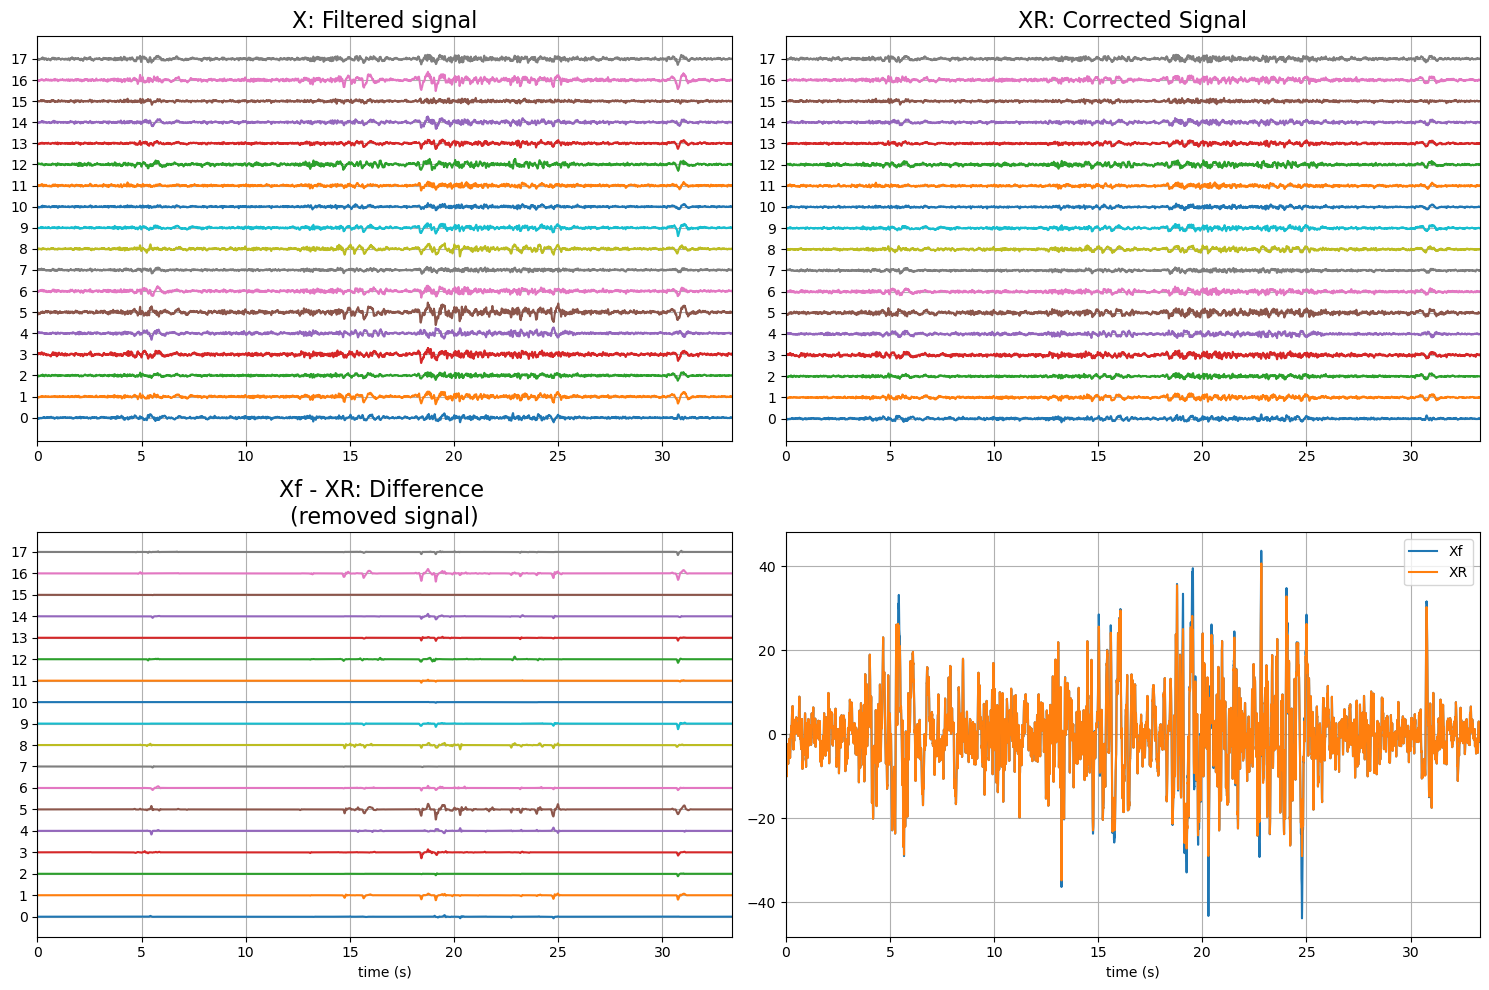

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t,Xf+np.arange(-9,9)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-9,9)*200,ch_names)
plt.grid()
plt.title('X: Filtered signal',fontsize=16)
plt.subplot(222)
plt.plot(t,XR1+np.arange(-9,9)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-9,9)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal',fontsize=16)
#plt.show()
#plt.figure(figsize=(12,5))
plt.subplot(223)
plt.plot(t,(Xf-XR1)+np.arange(-9,9)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-9,9)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference \n(removed signal)',fontsize=16)
# #plt.show()
plt.subplot(224)
plt.plot(t,Xf[:,0],label='Xf')
plt.plot(t,XR1[:,0],label='XR')
#plt.plot(t,Xf[:,0]-XR[:,0])
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()